In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("D:\internship data\intern data.xlsx" , sheet_name = "cleaned data" )

In [3]:
x_train_initial = df[[  'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O',
       'Cl', 'LOI', 'A.Eq', 'LSF', 'SM', 'AM',
       'C3S', 'C2S', 'C3A', 'C4AF', 
        '45 m R', '90 m R' , 'Blaine'
       
       ]]
x_train_final = df[[ 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O',
       'Cl', 'LOI', 'A.Eq', 'LSF', 'SM', 'AM',
       'C3S', 'C2S', 'C3A', 'C4AF', 
        '45 m R', '90 m R' , 'Blaine']]
y_train_initial = df['Initial']
y_train_final = df['Final']

In [ ]:
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Convert 1-D arrays into 2-D because the commands later will require it

y = np.expand_dims(y_train_initial, axis=1)


print(f"the shape of the targets y is: {y.shape}")

the shape of the targets y is: (1451, 1)


In [ ]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x_train_initial, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (870, 21)
the shape of the training set (target) is: (870, 1)

the shape of the cross validation set (input) is: (290, 21)
the shape of the cross validation set (target) is: (290, 1)

the shape of the test set (input) is: (291, 21)
the shape of the test set (target) is: (291, 1)


In [ ]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

In [ ]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 41.47498529938745
training MSE (for-loop implementation): 41.47498529938741


In [ ]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

#print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
#print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 41.31977458455498


In [ ]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[1.88200e+01 4.24000e+00 3.53000e+00 ... 8.41000e+00 8.96100e+03
  9.54810e+06]
 [1.96600e+01 4.49000e+00 3.99000e+00 ... 1.60000e+01 1.37600e+04
  1.18336e+07]
 [1.91800e+01 4.17000e+00 3.95000e+00 ... 2.11600e+01 1.42140e+04
  9.54810e+06]
 [2.08100e+01 4.24000e+00 4.36000e+00 ... 1.60000e+01 1.30000e+04
  1.05625e+07]
 [2.05900e+01 4.49000e+00 4.19000e+00 ... 2.11600e+01 1.43060e+04
  9.67210e+06]]


In [ ]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[-1.19008305 -0.06277515 -1.49735893 ... -1.31308201 -1.54103724
  -0.76602153]
 [ 0.46078953  1.17733334  0.3766225  ... -0.35932575  0.05229635
   1.37069013]
 [-0.48256623 -0.41000552  0.2136676  ...  0.28907771  0.20303056
  -0.76602153]
 [ 2.7209127  -0.06277515  1.88395539 ... -0.35932575 -0.20003404
   0.18234001]
 [ 2.28854131  1.17733334  1.19139704 ...  0.28907771  0.23357581
  -0.65009405]]


In [ ]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 28.124062322352206
Cross validation MSE: 9.903069292868179e+21


In [ ]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    degrees = range(1,5)
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()


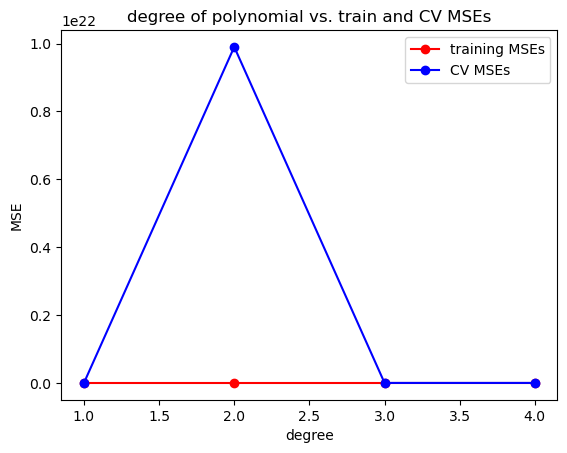

In [ ]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,5):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,5)
plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

In [ ]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=1


In [ ]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 41.47
Cross Validation MSE: 41.32
Test MSE: 40.39


In [ ]:
cv_mses

[41.319774584554935,
 9.903069292868179e+21,
 2183534.124565138,
 20724.764944913368]

In [ ]:
from sklearn.metrics import r2_score

r_2 = r2_score(y_test , yhat)
r_2

0.07190410544801795

Text(0.7, 0.1, 'R-squared: 0.0719')

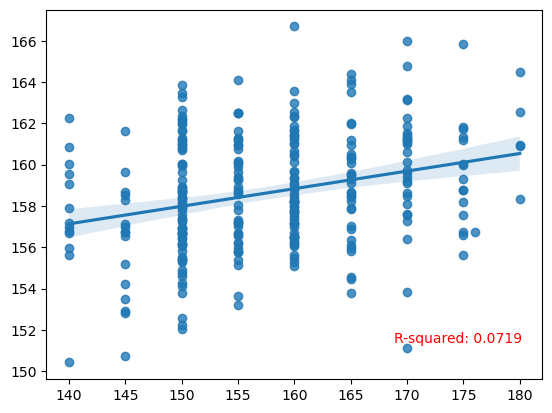

In [ ]:
sns.regplot(x = y_test , y = yhat , order = 1)
plt.annotate(f'R-squared: {r_2:.4f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=10, color='red')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


In [ ]:
dec_tree = DecisionTreeRegressor()

In [ ]:
hyper_param_dec_tree = {
    'max_depth': [1,2, 3, 4, 8, 16, 32, 64, None],
    'min_samples_split': [2,10, 30, 50, 100, 200, 300, 700],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(dec_tree, hyper_param_dec_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# Fit the model to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 8, 16, 32, 64, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 10, 30, 50, 100, 200, 300,
                                               700]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 200}


In [ ]:
dec_tree = DecisionTreeRegressor(max_depth= 4, min_samples_leaf= 1, min_samples_split= 200)

In [ ]:
dec_tree.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=200)

In [ ]:
yhat = dec_tree.predict(x_test)

In [ ]:
r_2 = r2_score(y_test , yhat)
r_2

0.15416753648233972

Text(0.7, 0.1, 'R-squared: 0.1542')

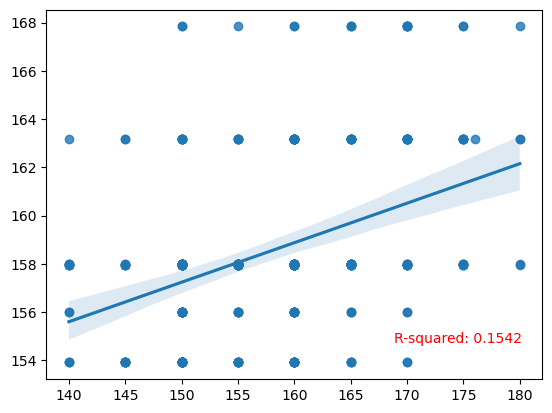

In [ ]:
sns.regplot(x = y_test , y = yhat)
plt.annotate(f'R-squared: {r_2:.4f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=10, color='red')

In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700 , 800 , 900] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
min_samples_leaf= [1,2, 3, 4, 8, 16, 32, 64 , 128 , 256 , 512 , 1024]

In [ ]:
RANDOM_STATE = 55

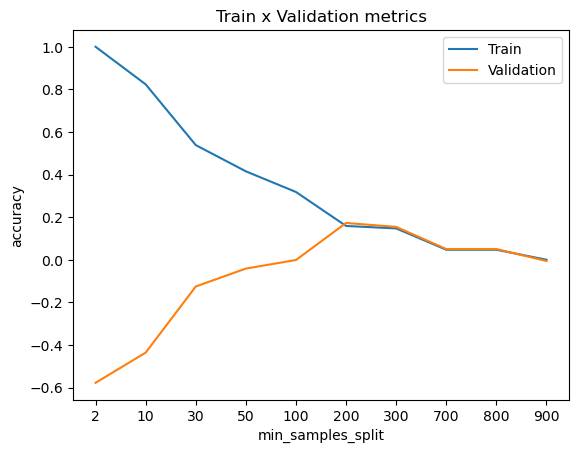

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = r2_score(y_train,predictions_train)
    accuracy_val = r2_score(y_test,predictions_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

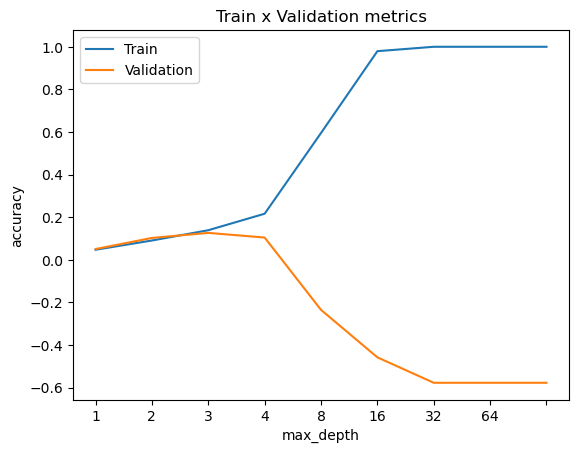

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(max_depth= max_depth,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = r2_score(y_train,predictions_train)
    accuracy_val = r2_score(y_test,predictions_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

min_samples_leaf= [1,2, 3, 4, 8, 16, 32, 64, None]

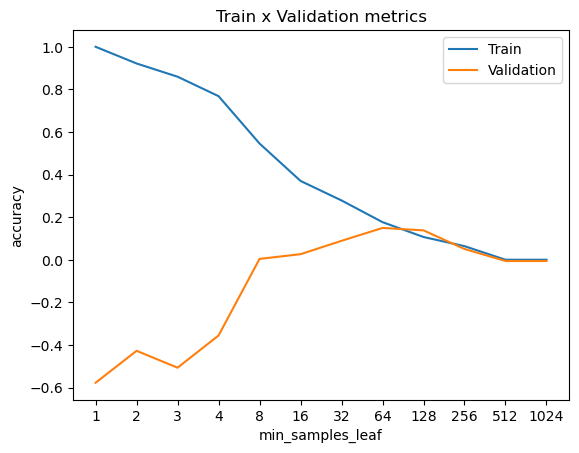

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_sample_leaf in min_samples_leaf:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(min_samples_leaf=min_sample_leaf ,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = r2_score(y_train,predictions_train)
    accuracy_val = r2_score(y_test,predictions_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_leaf)),labels=min_samples_leaf)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
min_samples_split = 800
max_depth = 1
min_sample_leaf = 256

In [ ]:
best_model_dec_trees = DecisionTreeRegressor(min_samples_split=800 , max_depth= 1 , min_samples_leaf = 256)

In [ ]:
best_model_dec_trees.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=256, min_samples_split=800)

In [ ]:
yhat = best_model_dec_trees.predict(x_train)

In [ ]:
r_2 = r2_score(y_train , yhat)
r_2

0.04696374131999981

Text(0.7, 0.1, 'R-squared: 0.0470')

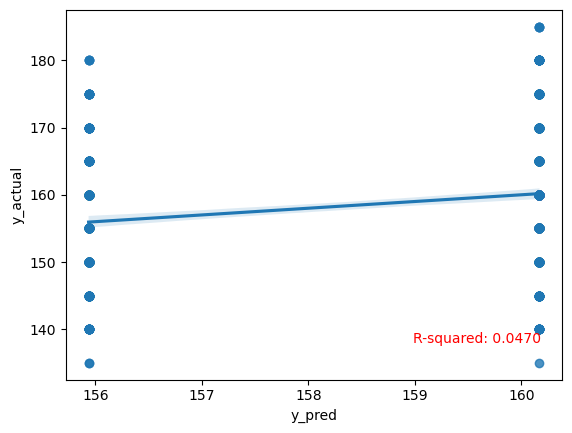

In [ ]:
sns.regplot(x = yhat , y = y_train)
plt.xlabel("y_pred")
plt.ylabel("y_actual")
plt.annotate(f'R-squared: {r_2:.4f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=10, color='red')

In [ ]:
from scipy.stats import randint
rf_param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10 , 15 , 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4 , 6 , 8 , 10 , 20 , 30],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

In [ ]:
rf_random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=rf_param_dist, n_iter=20, cv=3, random_state=42)
rf_random_search.fit(x_train, y_train.ravel())

print("Best parameters for Random Forest regressor:", rf_random_search.best_params_)
print("Best score for Random Forest regressor:", rf_random_search.best_score_)

Best parameters for Random Forest Classifier: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 466}
Best score for Random Forest Classifier: 0.12783970462728744


In [ ]:
model = RandomForestRegressor(bootstrap= True, max_depth= 20, min_samples_leaf= 6, min_samples_split= 15, n_estimators=466)

In [ ]:
model.fit(x_train_initial , y_train_initial.ravel())

RandomForestRegressor(max_depth=20, min_samples_leaf=6, min_samples_split=15,
                      n_estimators=466)

In [ ]:
yhat = model.predict(x_train_initial)

In [ ]:
r_2 = r2_score(y_train_initial , yhat)
r_2

0.6194445524275298

Text(0.5, 1.0, 'initial setting time accuracy')

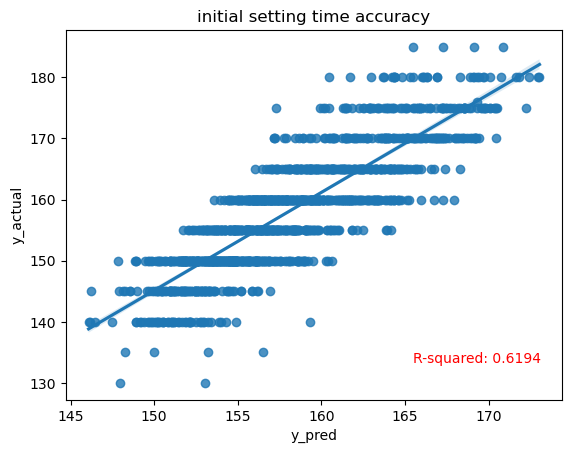

In [ ]:
sns.regplot(x = yhat , y = y_train_initial)
plt.xlabel("y_pred")
plt.ylabel("y_actual")
plt.annotate(f'R-squared: {r_2:.4f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=10, color='red')
plt.title("initial setting time accuracy")

In [ ]:
model.feature_importances_

array([0.03467823, 0.04688333, 0.02540121, 0.08830423, 0.05001896,
       0.05311067, 0.0484794 , 0.09662887, 0.        , 0.05747368,
       0.11385744, 0.02359733, 0.03983203, 0.01765812, 0.0316085 ,
       0.01898377, 0.03606887, 0.04121749, 0.07140897, 0.04022543,
       0.06456349])

In [ ]:
x_train

,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,LOI,...,LSF,SM,AM,C3S,C2S,C3A,C4AF,45 m R,90 m R,Blaine
674,18.82,4.24,3.53,60.65,3.45,3.34,0.41,0.46,0.04,3.70,...,97.20,2.42,1.20,60.77,8.13,5.29,10.72,17.6,2.9,3090
982,19.66,4.49,3.99,60.68,2.81,3.25,0.38,0.26,0.04,3.65,...,92.80,2.32,1.13,52.45,16.82,5.16,12.13,16.8,4.0,3440
1250,19.18,4.17,3.95,61.74,3.00,2.46,0.42,0.26,0.04,3.44,...,98.10,2.36,1.06,64.89,6.05,4.38,12.00,18.8,4.6,3090
1009,20.81,4.24,4.36,61.58,2.24,2.64,0.25,0.19,0.04,2.95,...,90.36,2.42,0.97,50.26,21.77,3.87,13.25,17.3,4.0,3250
1216,20.59,4.49,4.19,60.35,3.70,3.32,0.38,0.24,0.04,2.56,...,88.37,2.37,1.07,43.59,26.15,4.82,12.74,21.6,4.6,3110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,19.27,4.41,3.70,60.53,3.63,3.41,0.37,0.50,0.04,3.33,...,94.42,2.38,1.19,55.27,13.59,5.43,11.26,17.8,3.8,3070
905,19.52,4.05,4.16,61.50,3.01,3.04,0.37,0.24,0.04,3.46,...,95.56,2.38,0.97,60.18,10.58,3.70,12.65,16.5,3.1,3190
1096,19.62,4.11,4.04,61.91,2.51,3.23,0.24,0.18,0.04,2.92,...,95.58,2.41,1.02,60.29,10.78,4.08,12.27,15.0,3.0,3520
235,18.71,4.07,3.88,61.30,2.72,3.12,0.39,0.26,0.04,3.36,...,99.00,2.35,1.05,65.55,4.22,4.22,11.80,19.8,4.6,3160


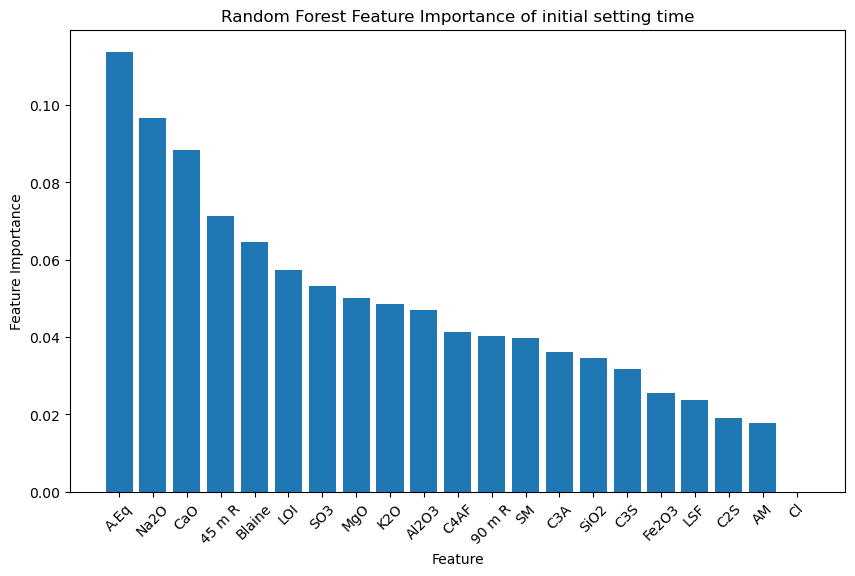

In [ ]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = x_train.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance of initial setting time")
plt.show()

In [ ]:
df["yhat_initial"] = pd.DataFrame(yhat)
df

,Class,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,...,2 d,28 d,Blaine,45 m R,90 m R,Cao_free,Unnamed: 31,diff,diff_initial_model_forest,yhat_initial
0,"CEM I 42,5 N",19.43,4.38,3.59,61.77,2.84,3.29,0.40,0.29,0.04,...,21.3,46.5,3290,18.3,2.7,1.22,20.801055,0.498945,8.741689,161.258311
1,"CEM I 42,5 N",19.49,4.62,3.57,61.93,2.89,3.03,0.40,0.30,0.04,...,21.3,45.9,3320,20.5,4.1,1.35,21.119374,0.180626,8.395510,161.604490
2,"CEM I 42,5 N",19.69,4.29,4.06,60.93,2.66,3.19,0.35,0.28,0.04,...,20.5,46.4,3290,18.7,3.2,1.40,20.205139,0.294861,9.217090,160.782910
3,"CEM I 42,5 N",18.88,4.41,3.54,61.84,2.80,3.16,0.43,0.31,0.04,...,21.9,47.3,3340,18.7,3.5,1.30,20.792741,1.107259,7.329762,162.670238
4,"CEM I 42,5 N",19.22,4.25,3.74,61.65,2.83,3.02,0.41,0.28,0.04,...,22.0,46.3,3160,19.5,3.5,1.64,20.284507,1.715493,7.273331,162.726669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,"CEM I 42,5 N",20.52,4.39,4.69,59.68,3.57,3.00,0.30,0.23,0.04,...,21.6,48.6,3710,19.8,4.2,NaN,19.184548,2.415452,9.316721,160.683279
1447,"CEM I 42,5 N",20.41,4.36,4.67,59.73,3.51,3.52,0.30,0.23,0.04,...,19.5,47.1,3570,17.6,3.8,NaN,19.601347,0.101347,8.485765,161.514235
1448,"CEM I 42,5 N",20.56,4.38,4.68,59.85,3.90,3.06,0.31,0.24,0.04,...,22.6,48.3,3210,21.9,4.1,NaN,19.656448,2.943552,11.222747,158.777253
1449,"CEM I 42,5 N",21.86,6.38,4.14,55.71,4.07,3.46,0.34,0.21,0.04,...,21.7,47.5,3720,16.3,3.3,NaN,23.724581,2.024581,12.707901,157.292099


,0
0,8.741689
1,1.604490
2,4.217090
3,7.329762
4,2.726669
...,...
1446,9.316721
1447,13.485765
1448,6.222747
1449,17.707901


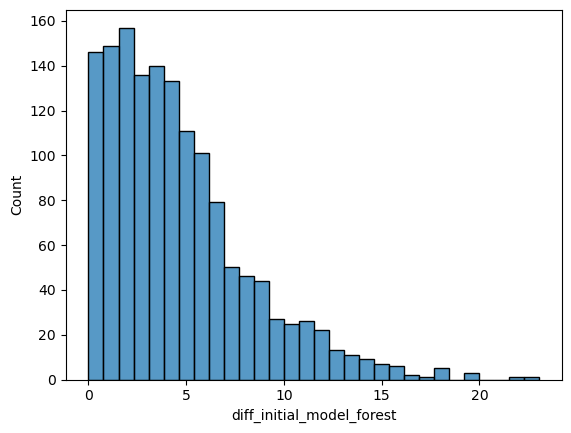

In [ ]:
diff = np.abs(df['yhat_initial'] - df['Initial'])
#diff = diff[0]
diff = pd.DataFrame(diff)
df["diff_initial_model_forest"] = diff
sns.histplot(data = df,x ="diff_initial_model_forest")
diff

In [ ]:
df[["Initial" ,"yhat_initial" ,"diff_initial_model_forest"]].head(20)

,Initial,yhat_initial,diff_initial_model_forest
0,170,161.258311,8.741689
1,160,161.604490,1.604490
2,165,160.782910,4.217090
3,170,162.670238,7.329762
4,160,162.726669,2.726669
5,165,161.419596,3.580404
6,175,163.947288,11.052712
7,160,164.112072,4.112072
8,155,160.559262,5.559262
9,155,159.775143,4.775143


In [ ]:
np.sum(df["diff_initial_model_forest"])/len(df["diff_initial_model_forest"])

4.602424722879174

In [ ]:
df

,Class,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,...,2 d,28 d,Blaine,45 m R,90 m R,Cao_free,Unnamed: 31,diff,diff_initial_model_forest,yhat_initial
0,"CEM I 42,5 N",19.43,4.38,3.59,61.77,2.84,3.29,0.40,0.29,0.04,...,21.3,46.5,3290,18.3,2.7,1.22,20.801055,0.498945,8.741689,161.258311
1,"CEM I 42,5 N",19.49,4.62,3.57,61.93,2.89,3.03,0.40,0.30,0.04,...,21.3,45.9,3320,20.5,4.1,1.35,21.119374,0.180626,1.604490,161.604490
2,"CEM I 42,5 N",19.69,4.29,4.06,60.93,2.66,3.19,0.35,0.28,0.04,...,20.5,46.4,3290,18.7,3.2,1.40,20.205139,0.294861,4.217090,160.782910
3,"CEM I 42,5 N",18.88,4.41,3.54,61.84,2.80,3.16,0.43,0.31,0.04,...,21.9,47.3,3340,18.7,3.5,1.30,20.792741,1.107259,7.329762,162.670238
4,"CEM I 42,5 N",19.22,4.25,3.74,61.65,2.83,3.02,0.41,0.28,0.04,...,22.0,46.3,3160,19.5,3.5,1.64,20.284507,1.715493,2.726669,162.726669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,"CEM I 42,5 N",20.52,4.39,4.69,59.68,3.57,3.00,0.30,0.23,0.04,...,21.6,48.6,3710,19.8,4.2,NaN,19.184548,2.415452,9.316721,160.683279
1447,"CEM I 42,5 N",20.41,4.36,4.67,59.73,3.51,3.52,0.30,0.23,0.04,...,19.5,47.1,3570,17.6,3.8,NaN,19.601347,0.101347,13.485765,161.514235
1448,"CEM I 42,5 N",20.56,4.38,4.68,59.85,3.90,3.06,0.31,0.24,0.04,...,22.6,48.3,3210,21.9,4.1,NaN,19.656448,2.943552,6.222747,158.777253
1449,"CEM I 42,5 N",21.86,6.38,4.14,55.71,4.07,3.46,0.34,0.21,0.04,...,21.7,47.5,3720,16.3,3.3,NaN,23.724581,2.024581,17.707901,157.292099


Text(0, 0.5, 'difference in minutes')

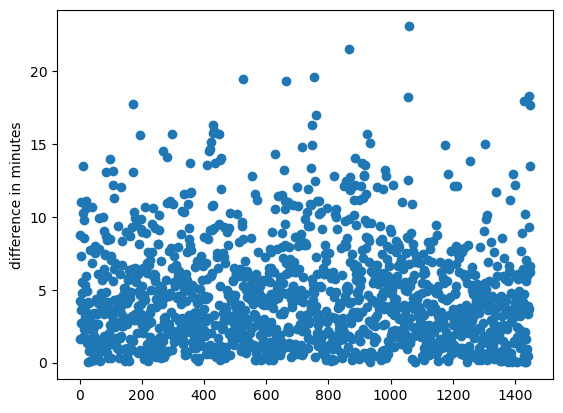

In [ ]:
plt.scatter(x = np.arange(0 ,1451) , y = df["diff_initial_model_forest"] )
plt.ylabel("difference in minutes")

i know the accuracy isn't that good and this type of model i used maybe isn't compatible with this type of data but in the future we can try different approached but you need to know that scientifically these features aren't enough to predict the setting time